------------ PART 2 ----------------

Now that you have built a dataframe of the postal code of each neighborhood along with the borough name and neighborhood name, in order to utilize the Foursquare location data, we need to get the latitude and the longitude coordinates of each neighborhood.

In an older version of this course, we were leveraging the Google Maps Geocoding API to get the latitude and the longitude coordinates of each neighborhood. However, recently Google started charging for their API: http://geoawesomeness.com/developers-up-in-arms-over-google-maps-api-insane-price-hike/, so we will use the Geocoder Python package instead: https://geocoder.readthedocs.io/index.html.

The problem with this Package is you have to be persistent sometimes in order to get the geographical coordinates of a given postal code. So you can make a call to get the latitude and longitude coordinates of a given postal code and the result would be None, and then make the call again and you would get the coordinates. So, in order to make sure that you get the coordinates for all of our neighborhoods, you can run a while loop for each postal code. Taking postal code M5G as an example, your code would look something like this:

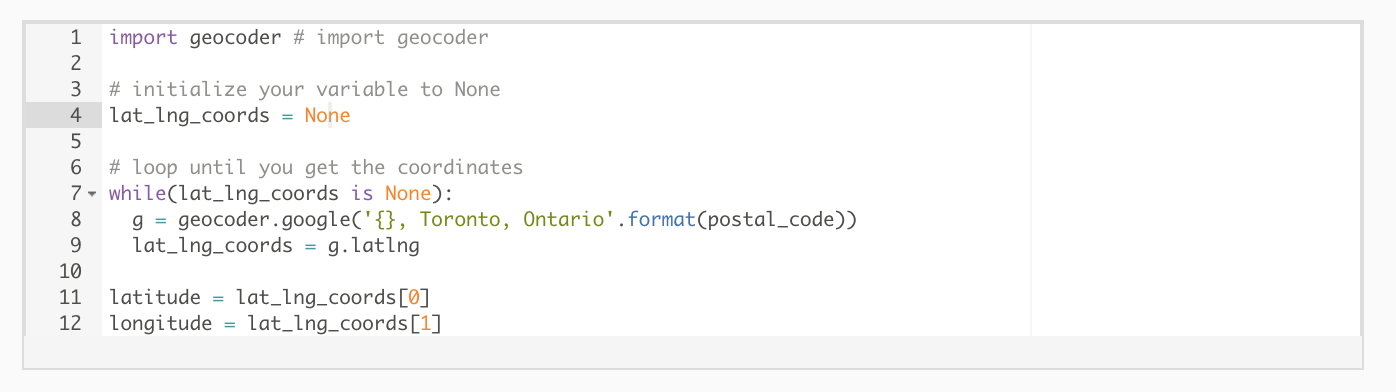

Given that this package can be very unreliable, in case you are not able to get the geographical coordinates of the neighborhoods using the Geocoder package, here is a link to a csv file that has the geographical coordinates of each postal code: http://cocl.us/Geospatial_data

Use the Geocoder package or the csv file to create the following dataframe:

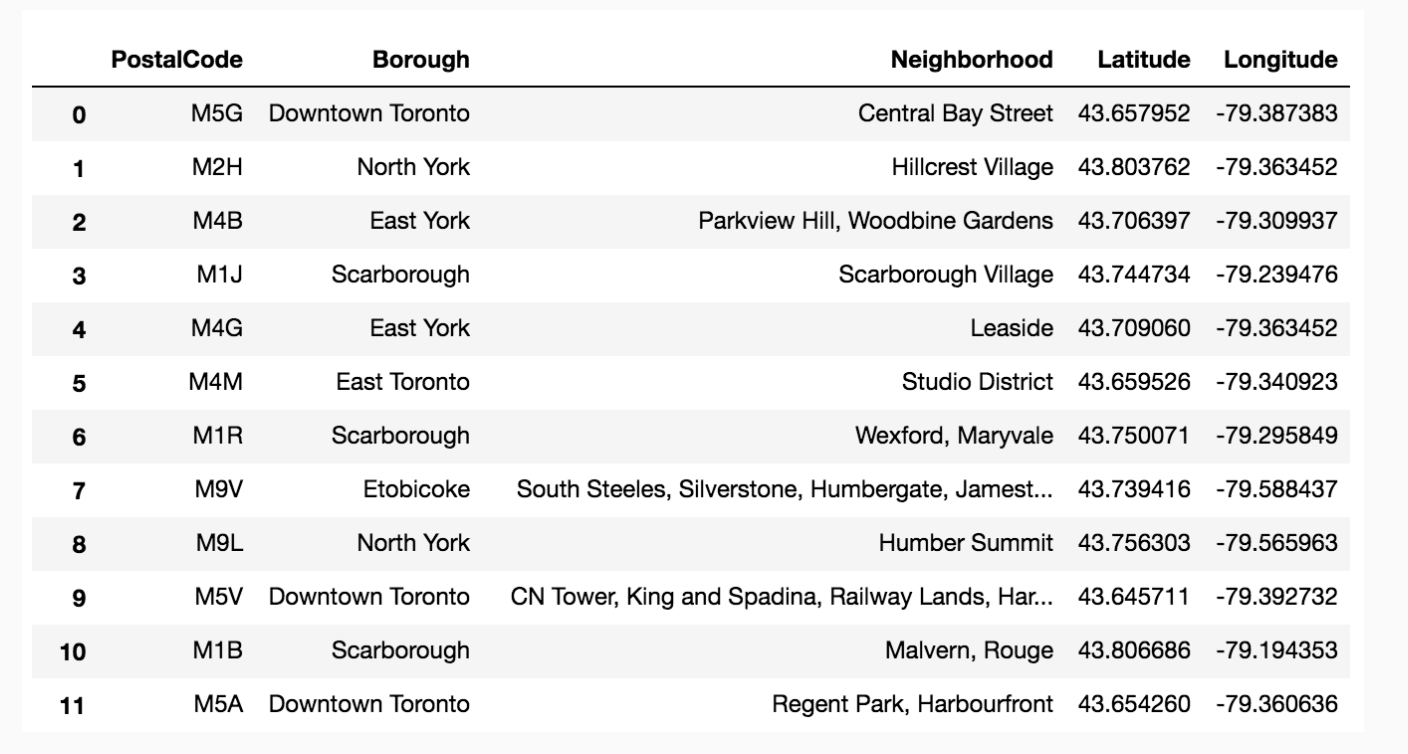

Important Note: There is a limit on how many times you can call geocoder.google function. It is 2500 times per day. This should be way more than enough for you to get acquainted with the package and to use it to get the geographical coordinates of the neighborhoods in the Toronto.

Once you are able to create the above dataframe, submit a link to the new Notebook on your Github repository. (2 marks)

# Repeating Part 1. Part 2 starts on line 7.

In [1]:
# install Beautiful Soup and requests for scraping
!pip install BeautifulSoup4
!pip install requests
print('done.')

done.


In [2]:
# import libraries
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np

# get html from the wiki page, then create my soup object
source = requests.get("https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M")
soup = BeautifulSoup(source.text, 'lxml')

#using soup object, iterate the .wikitable to get parsed data from the HTML page. store in a list.
data = []
columns = []
table = soup.find(class_='wikitable')
for index, tr in enumerate(table.find_all('tr')):
    section = []
    for td in tr.find_all(['th','td']):
        section.append(td.text.rstrip())
    
    #First row of data is the header
    if (index == 0):
        columns = section
    else:
        data.append(section)

#convert list into Pandas DataFrame
canada_df = pd.DataFrame(data = data,columns = columns)
canada_df.head()

,Postcode,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront


In [3]:
# remove Boroughs that are 'Not assigned'
canada_df = canada_df[canada_df['Borough'] != 'Not assigned']
canada_df.head()

,Postcode,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M5A,Downtown Toronto,Regent Park
6,M6A,North York,Lawrence Heights


In [4]:
# more than one neighborhood can exist in one postal code area.
# combine into one row. separate neighborhoods with a comma.
canada_df['Neighbourhood'] = canada_df.groupby('Postcode')['Neighbourhood'].transform(lambda neigh: ', '.join(neigh))

# remove the duplicates
canada_df = canada_df.drop_duplicates()

# update index to postcode format
if(canada_df.index.name != 'Postcode'):
    canada_df = canada_df.set_index('Postcode')

# let's see how this looks now
canada_df.head()

,Borough,Neighbourhood
Postcode,,
M3A,North York,Parkwoods
M4A,North York,Victoria Village
M5A,Downtown Toronto,"Harbourfront, Regent Park"
M6A,North York,"Lawrence Heights, Lawrence Manor"
M7A,Queen's Park,Not assigned


In [5]:
# remember that a neighborhood will be the same as the borough if neighborhood is 'Not assigned'. 
canada_df['Neighbourhood'].replace("Not assigned", canada_df["Borough"],inplace=True)
canada_df.head()

,Borough,Neighbourhood
Postcode,,
M3A,North York,Parkwoods
M4A,North York,Victoria Village
M5A,Downtown Toronto,"Harbourfront, Regent Park"
M6A,North York,"Lawrence Heights, Lawrence Manor"
M7A,Queen's Park,Queen's Park


In [6]:
# use the shape method to print the number of rows and columns in new dataframe
canada_df.shape

(103, 2)

# Part 2

In [7]:
# import the CSV into Python
Geospatial_Coordinates = "http://cocl.us/Geospatial_data"

# Get the coordinates while specifying column names
lat_long_coord_df = pd.read_csv(Geospatial_Coordinates) # this empty. fill it
lat_long_coord_df.columns =["Postcode", "Latitude", "Longitude"]

# set the index to be 'Postcode'
if(lat_long_coord_df.index.name != 'Postcode'):
    lat_long_coord_df = lat_long_coord_df.set_index('Postcode')
    
lat_long_coord_df.head()

,Latitude,Longitude
Postcode,,
M1B,43.806686,-79.194353
M1C,43.784535,-79.160497
M1E,43.763573,-79.188711
M1G,43.770992,-79.216917
M1H,43.773136,-79.239476


In [8]:
canada_df = canada_df.join(lat_long_coord_df)
canada_df.head(11)

,Borough,Neighbourhood,Latitude,Longitude
Postcode,,,,
M3A,North York,Parkwoods,43.753259,-79.329656
M4A,North York,Victoria Village,43.725882,-79.315572
M5A,Downtown Toronto,"Harbourfront, Regent Park",43.654260,-79.360636
M6A,North York,"Lawrence Heights, Lawrence Manor",43.718518,-79.464763
M7A,Queen's Park,Queen's Park,43.662301,-79.389494
M9A,Etobicoke,Islington Avenue,43.667856,-79.532242
M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
M3B,North York,Don Mills North,43.745906,-79.352188
M4B,East York,"Woodbine Gardens, Parkview Hill",43.706397,-79.309937
